<a href="https://colab.research.google.com/github/SparkyGoLarky/SparkyGoLarky/blob/main/KMeans_clustering_machine_learning_on_S%26P_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("stocks.csv")
data.tail()

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,...,WMB,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZTS
246,2022-12-23 00:00:00-05:00,120.139999,56.617199,107.692398,161.564163,381.019989,265.006012,75.949997,94.104889,338.450012,...,33.320000,NaN,80.720001,70.446365,NaN,109.730003,128.899994,248.220001,126.690002,145.418304
247,2022-12-27 00:00:00-05:00,120.220001,57.383366,108.080643,161.455200,NaN,264.229187,75.790001,95.387871,335.089996,...,33.410000,NaN,84.330002,71.082001,NaN,110.720001,129.899994,251.000000,127.279999,144.959396
248,2022-12-28 00:00:00-05:00,118.290001,56.487843,107.343979,160.702347,NaN,262.048126,76.050003,93.110336,328.329987,...,32.720001,NaN,80.089996,70.570000,NaN,108.940002,129.309998,246.839996,125.989998,143.492844
249,2022-12-29 00:00:00-05:00,120.570000,57.373417,109.812798,161.029236,NaN,267.286682,76.760002,92.613060,337.579987,...,32.970001,NaN,81.260002,71.070000,NaN,111.639999,129.990005,257.529999,127.830002,147.802704
250,2022-12-30 00:00:00-05:00,119.919998,56.955509,109.295143,160.088181,NaN,265.752960,76.550003,92.344521,336.529999,...,32.900002,NaN,82.470001,70.110001,NaN,110.570000,128.080002,256.410004,127.500000,146.206467


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Columns: 501 entries, Date to ZTS
dtypes: float64(500), object(1)
memory usage: 982.6+ KB


In [5]:
data = data.dropna(axis=1)
data.head()

,Date,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,AAP,...,WY,WHR,WMB,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
0,2022-01-03 00:00:00-05:00,170.510223,81.622803,136.128998,129.114441,400.092896,67.021614,66.262711,564.369995,228.551392,...,38.387993,223.222824,25.205801,87.769997,66.098251,115.388885,133.955200,583.900024,124.332092,231.780838
1,2022-01-04 00:00:00-05:00,172.898926,82.980415,132.927460,128.866547,397.233765,66.802917,67.492500,554.000000,228.812027,...,38.880032,229.717102,25.434082,87.489998,66.516579,116.612968,134.671417,587.599976,125.593407,222.956482
2,2022-01-05 00:00:00-05:00,172.189056,81.593498,132.330261,129.543472,390.238220,65.898293,66.965446,514.429993,228.232849,...,37.914883,226.043091,25.491152,84.250000,67.168427,115.023643,132.964249,558.179993,125.179390,214.478729
3,2022-01-06 00:00:00-05:00,170.759644,82.140457,132.310669,128.933258,371.393433,63.442890,67.560837,514.119995,233.252167,...,38.217674,224.230072,26.099895,84.639999,66.643059,114.865692,134.337830,555.159973,124.139511,215.330460
4,2022-01-07 00:00:00-05:00,172.630325,81.212601,132.721863,128.599579,364.270081,63.661591,68.136681,510.700012,229.815872,...,38.170364,217.793320,26.642057,84.550003,67.226799,113.947639,132.797455,530.859985,123.388489,209.061295


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Columns: 483 entries, Date to ZTS
dtypes: float64(482), object(1)
memory usage: 947.3+ KB


In [7]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,AAP,AMD,...,WY,WHR,WMB,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03 00:00:00-05:00,170.510223,81.622803,136.128998,129.114441,400.092896,67.021614,66.262711,564.369995,228.551392,150.240005,...,38.387993,223.222824,25.205801,87.769997,66.098251,115.388885,133.955200,583.900024,124.332092,231.780838
2022-01-04 00:00:00-05:00,172.898926,82.980415,132.927460,128.866547,397.233765,66.802917,67.492500,554.000000,228.812027,144.419998,...,38.880032,229.717102,25.434082,87.489998,66.516579,116.612968,134.671417,587.599976,125.593407,222.956482
2022-01-05 00:00:00-05:00,172.189056,81.593498,132.330261,129.543472,390.238220,65.898293,66.965446,514.429993,228.232849,136.149994,...,37.914883,226.043091,25.491152,84.250000,67.168427,115.023643,132.964249,558.179993,125.179390,214.478729
2022-01-06 00:00:00-05:00,170.759644,82.140457,132.310669,128.933258,371.393433,63.442890,67.560837,514.119995,233.252167,136.229996,...,38.217674,224.230072,26.099895,84.639999,66.643059,114.865692,134.337830,555.159973,124.139511,215.330460
2022-01-07 00:00:00-05:00,172.630325,81.212601,132.721863,128.599579,364.270081,63.661591,68.136681,510.700012,229.815872,132.000000,...,38.170364,217.793320,26.642057,84.550003,67.226799,113.947639,132.797455,530.859985,123.388489,209.061295


In [8]:
returns = data.pct_change()
returns = returns.dropna()
returns.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,AAP,AMD,...,WY,WHR,WMB,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00-05:00,0.014009,0.016633,-0.023518,-0.001920,-0.007146,-0.003263,0.018559,-0.018374,0.001140,-0.038738,...,0.012818,0.029093,0.009057,-0.003190,0.006329,0.010608,0.005347,0.006337,0.010145,-0.038072
2022-01-05 00:00:00-05:00,-0.004106,-0.016714,-0.004493,0.005253,-0.017611,-0.013542,-0.007809,-0.071426,-0.002531,-0.057264,...,-0.024824,-0.015994,0.002244,-0.037033,0.009800,-0.013629,-0.012677,-0.050068,-0.003296,-0.038024
2022-01-06 00:00:00-05:00,-0.008301,0.006703,-0.000148,-0.004710,-0.048290,-0.037260,0.008891,-0.000603,0.021992,0.000588,...,0.007986,-0.008021,0.023881,0.004629,-0.007822,-0.001373,0.010330,-0.005410,-0.008307,0.003971
2022-01-07 00:00:00-05:00,0.010955,-0.011296,0.003108,-0.002588,-0.019180,0.003447,0.008523,-0.006652,-0.014732,-0.031050,...,-0.001238,-0.028706,0.020773,-0.001063,0.008759,-0.007992,-0.011466,-0.043771,-0.006050,-0.029114
2022-01-10 00:00:00-05:00,-0.014115,-0.003127,-0.002213,0.011195,0.006069,-0.014522,0.001719,0.029626,-0.016632,0.000000,...,-0.004710,-0.020217,-0.002142,-0.028149,0.010999,-0.010136,-0.013964,0.008571,-0.009754,0.007153


In [9]:
trading_days = 252
average_yearly_returns = returns.mean() * trading_days
print(average_yearly_returns)

MMM    -0.317108
AOS    -0.313828
ABT    -0.185633
ABBV    0.242049
ACN    -0.357246
          ...   
XYL     0.018772
YUM    -0.016207
ZBRA   -0.719087
ZBH     0.071814
ZTS    -0.412983
Length: 482, dtype: float64


In [10]:
yearly_return_variance = returns.var() * trading_days
print(yearly_return_variance)

MMM     0.074662
AOS     0.097828
ABT     0.071277
ABBV    0.050306
ACN     0.109891
          ...   
XYL     0.123491
YUM     0.058120
ZBRA    0.215990
ZBH     0.093325
ZTS     0.101711
Length: 482, dtype: float64


In [11]:
yearly_data = pd.DataFrame(data.columns, columns = ["Stock"])
yearly_data["Returns"] = average_yearly_returns.values
yearly_data.head()

,Stock,Returns
0,MMM,-0.317108
1,AOS,-0.313828
2,ABT,-0.185633
3,ABBV,0.242049
4,ACN,-0.357246


In [12]:
yearly_data["Variance"] = yearly_return_variance.values
yearly_data.head()

,Stock,Returns,Variance
0,MMM,-0.317108,0.074662
1,AOS,-0.313828,0.097828
2,ABT,-0.185633,0.071277
3,ABBV,0.242049,0.050306
4,ACN,-0.357246,0.109891


In [14]:
from sklearn.cluster import KMeans
x = yearly_data[["Returns", "Variance"]].values
inertia = []
for k in range(2, 10):
  model = KMeans()
  model.fit(x)
  inertia.append(model.inertia_)
print(inertia)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[3.894614156263577, 3.895067364755298, 3.885757915077493, 3.9057066809018535, 3.927380517259773, 3.936445264880706, 3.9199962983882632, 3.8872224779446247]


Text(0, 0.5, 'Error')

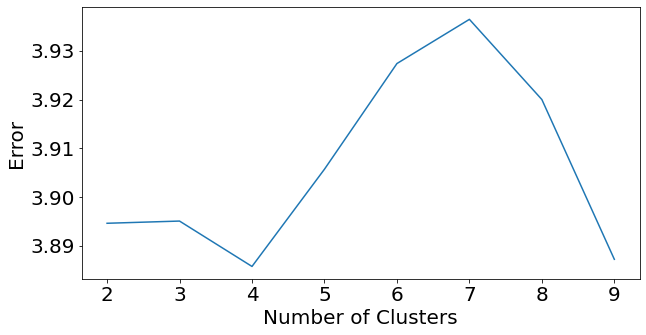

In [23]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({"font.size":20})
plt.plot(range(2,10), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Error")

In [24]:
model = KMeans(n_clusters = 4)
model.fit(x)
print(model.labels_)

[0 0 0 1 0 1 2 3 3 3 1 1 1 1 0 0 1 0 3 0 1 1 3 3 1 3 1 1 0 1 0 1 0 0 1 1 1
 1 0 1 3 1 2 0 3 3 0 1 0 1 1 0 1 1 0 0 2 0 3 3 1 0 3 0 1 0 0 1 0 1 3 1 1 0
 0 0 0 0 3 2 3 2 3 3 0 3 1 1 0 0 3 1 1 3 2 3 1 3 2 0 1 0 2 1 1 0 0 0 0 0 1
 1 3 1 0 0 1 2 1 1 0 0 1 0 2 0 0 1 0 0 0 1 0 1 0 3 2 1 2 3 0 3 1 1 0 3 0 1
 1 1 0 0 0 1 3 3 1 3 0 2 1 2 1 2 0 0 0 3 0 3 1 1 1 1 3 0 0 2 3 0 0 0 3 0 3
 1 1 0 1 3 0 0 3 0 0 0 1 0 0 1 3 1 0 1 3 1 1 0 1 0 2 3 3 1 0 1 2 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 3 1 0 3 0 0 0 1 3 0 0 3 0 1 0 1 0 1 1 0 0 1 1 0 0 1
 0 1 1 1 1 1 0 3 2 2 0 1 0 3 1 3 1 2 1 0 3 1 1 2 2 0 1 1 0 0 1 3 0 1 2 0 2
 1 0 0 0 3 0 0 0 3 1 1 0 1 0 0 1 0 1 0 3 3 0 0 0 1 0 1 0 0 2 3 0 2 3 0 0 1
 2 0 1 1 1 1 1 1 1 1 0 0 3 3 3 1 0 1 1 2 1 2 0 3 0 1 1 1 1 0 1 1 1 0 0 0 3
 3 2 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 3 0 3 0 2 3 0 1 3 0 0 3 1 1 0 3 0 0 0 1
 3 0 1 1 1 3 3 1 0 0 0 0 3 3 0 1 0 1 1 1 1 3 0 1 1 0 1 3 0 3 0 0 0 1 3 0 0
 0 1 1 1 2 0 0 0 0 2 3 0 1 3 0 2 1 1 0 1 1 1 1 0 3 3 0 0 0 3 2 1 1 1 1 3 1
 3]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
yearly_data["Cluster"] = model.labels_
yearly_data.head()

,Stock,Returns,Variance,Cluster
0,MMM,-0.317108,0.074662,0
1,AOS,-0.313828,0.097828,0
2,ABT,-0.185633,0.071277,0
3,ABBV,0.242049,0.050306,1
4,ACN,-0.357246,0.109891,0


Text(0, 0.5, 'Variance')

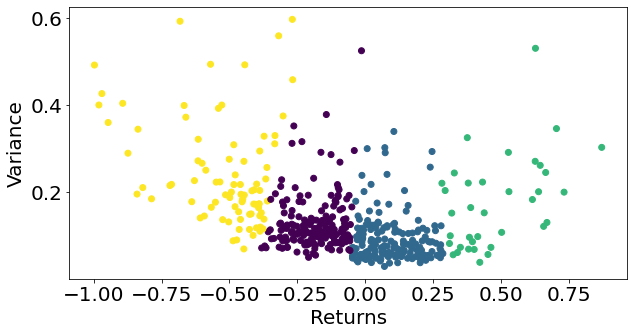

In [28]:
plt.scatter(x[:,0], x[:,1], c=model.labels_)
plt.xlabel("Returns")
plt.ylabel("Variance")